In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import talib

import wrangle as w

#testing function/ creating combined file
df=w.create_combined_file()

df.head()

In [2]:
#get combine file
df=w.get_amzn()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6283 entries, 1999-01-04 to 2023-12-20
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open            6283 non-null   float64
 1   high            6283 non-null   float64
 2   low             6283 non-null   float64
 3   close           6283 non-null   float64
 4   adjusted_close  6283 non-null   float64
 5   volume          6283 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 343.6 KB


In [3]:
train,test=w.train_test_split(df)

In [5]:
train.head(), test.head()

(            open  high   low  close  adjusted_close      volume
 date                                                           
 1999-01-04  2.73  2.97  2.67   2.96            2.96   785844000
 1999-01-05  2.74  3.24  2.66   3.11            3.11  1257464000
 1999-01-06  3.41  3.51  3.35   3.45            3.45   723532000
 1999-01-07  3.43  4.01  3.33   3.97            3.97   945492000
 1999-01-08  4.61  4.98  3.80   4.01            4.01  1333244000,
              open   high    low  close  adjusted_close     volume
 date                                                             
 2016-06-27  34.60  34.84  34.11  34.57           34.57  111360000
 2016-06-28  35.00  35.40  34.91  35.40           35.40   80740000
 2016-06-29  35.79  35.97  35.68  35.78           35.78   61402000
 2016-06-30  35.86  35.97  35.63  35.78           35.78   57102000
 2016-07-01  35.87  36.40  35.83  36.28           36.28   58408000)

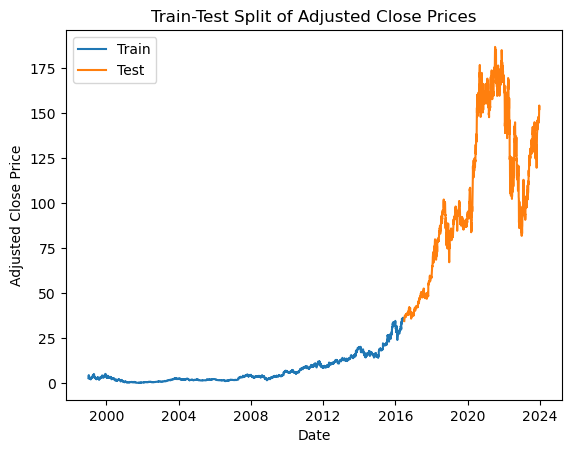

In [6]:
w.plotting_train_test(train,test)

# LET'S EXPLORE:

In [7]:


def plot_stock_prices_by_years(df, years_to_plot):
    """
    Plot stock prices for specific years.

    Parameters:
        df (pd.DataFrame): DataFrame with stock price data.
        years_to_plot (list): List of years to plot.

    Returns:
        None
    """
    # Convert the index to datetime if not already
    df.index = pd.to_datetime(df.index)

    # Filter the DataFrame for the specified years
    filtered_df = df[df.index.year.isin(years_to_plot)]

    # Plotting
    plt.plot(filtered_df.index, filtered_df['adjusted_close'], label='Amazon Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.title('Amazon Stock Price for Specific Years')
    plt.legend()
    plt.show()

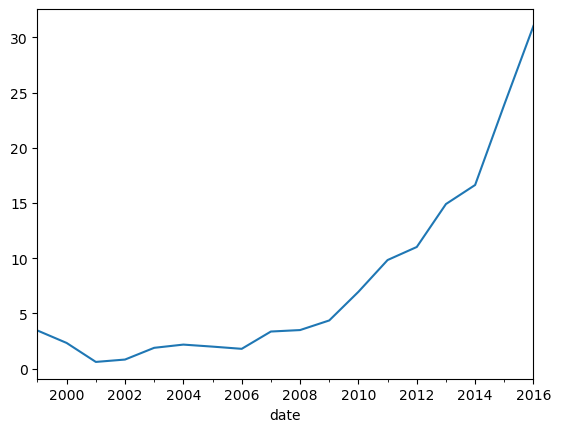

In [10]:
#1. How has the overall trend in Amazon stock prices evolved over the entire 
# time period available in the dataset?

train['adjusted_close'].resample('Y').mean().plot(label='Yearly')
plt.show()

1. stock prices had a steady increase from 2010 on. Even tho during 2000 through 2009 the increae was minimal there was a small increase and adjustment periods. 

#2. Are there any noticeable long-term patterns, upward or downward trends, and what factors might have contributed to these trends?

2005: Amazon launches Prime membership

2007: Amazon launches its first consumer product: The Kindle

2022: Amazon has more than 2 billion annual visitors per month

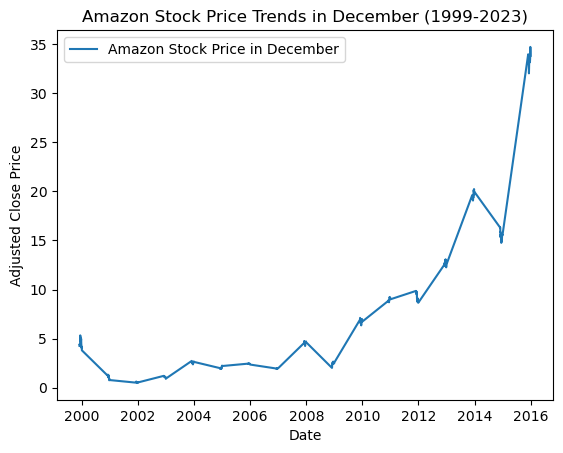

In [22]:
#3. Are there discernible seasonal patterns or cyclical trends in Amazon stock prices, 
# such as variations across months, quarters, or years?

selected_month =12

# Filter the DataFrame for the selected month across all years
december_data = train[train.index.month == selected_month]

# Plotting
plt.plot(december_data.index, december_data['adjusted_close'], label='Amazon Stock Price in December')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title(f'Amazon Stock Price Trends in December (1999-2023)')
plt.legend()
plt.show()
#Seeing patterns during christmas time

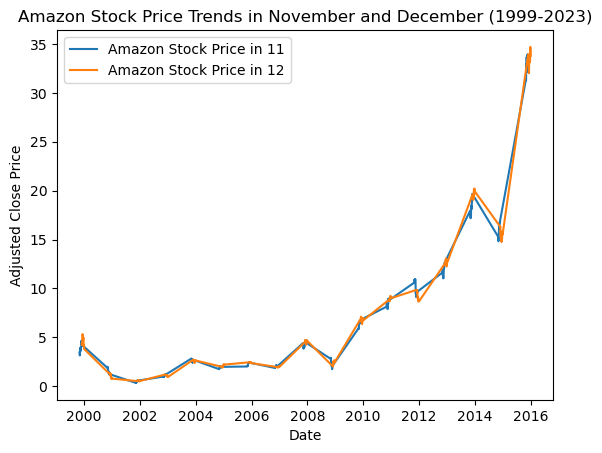

In [23]:
# Select specific months
selected_months = [11, 12]  # November and December

# Filter the DataFrame for the selected months across all years
selected_months_data = train[train.index.month.isin(selected_months)]

# Plotting
for month in selected_months:
    month_data = selected_months_data[selected_months_data.index.month == month]
    plt.plot(month_data.index, month_data['adjusted_close'], label=f'Amazon Stock Price in {month}')

plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title(f'Amazon Stock Price Trends in November and December (1999-2023)')
plt.legend()
plt.show()
#Seeing patterns during black fridays, christmas time

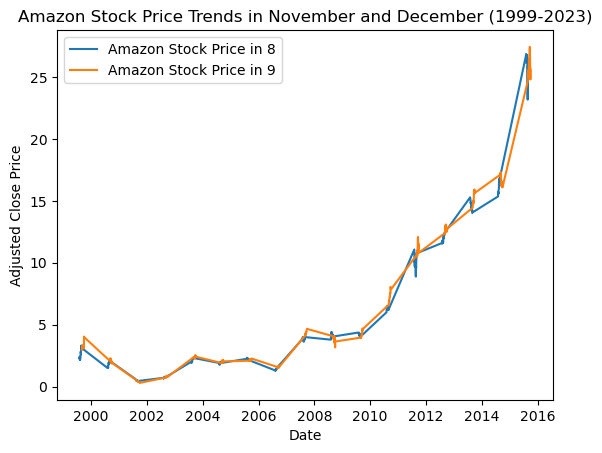

In [25]:
# Select specific months
selected_months = [8,9]  # November and December

# Filter the DataFrame for the selected months across all years
selected_months_data = train[train.index.month.isin(selected_months)]

# Plotting
for month in selected_months:
    month_data = selected_months_data[selected_months_data.index.month == month]
    plt.plot(month_data.index, month_data['adjusted_close'], label=f'Amazon Stock Price in {month}')

plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title(f'Amazon Stock Price Trends in November and December (1999-2023)')
plt.legend()
plt.show()
#Seeing patterns during back to school time August, September

3. There is a slight variation acrros certain seasonal periods such as black friday, christmas and back to school time. 

- The months of November and December had similar trends, where 2008-2010 it had a drastic drop and 2014-2016 had another drastic stops both followed by steady increase of stock price.
- The months August and September had similar trends and minimal drops of stock prices after 2008. Except during 2012 the month of August had a small drastic drop maybe a market adjustment. 


In [29]:
#4.How variable are Amazon stock prices over time?
#5.Has there been any significant change in volatility during specific periods?

#will be using statistics to answer these questions:

# Calculate overall standard deviation
overall_volatility = train['adjusted_close'].std()


# Calculate standard deviation for specific periods (e.g., yearly)
yearly_volatility = train['adjusted_close'].resample('Y').std()


# Calculate rolling standard deviation with a window of 30 days
rolling_volatility = train['adjusted_close'].rolling(window=30).std()

# Calculate percentage change
percentage_change = train['adjusted_close'].pct_change()

# Analyze distribution of percentage changes
percentage_change.describe()

count    4397.000000
mean        0.001265
std         0.037875
min        -0.250000
25%        -0.014643
50%         0.000000
75%         0.016077
max         0.355556
Name: adjusted_close, dtype: float64

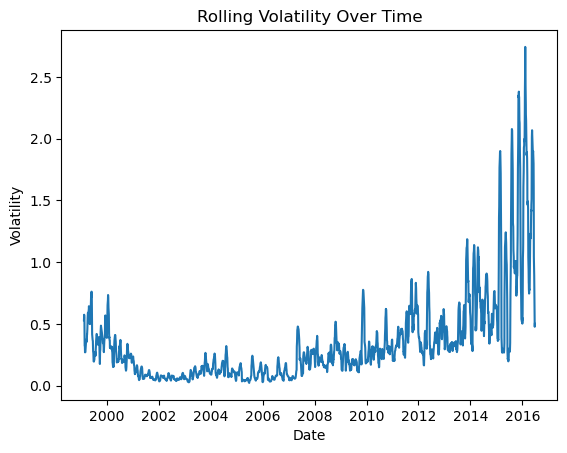

In [30]:
plt.plot(rolling_volatility)
plt.title('Rolling Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

5. After 2014 the volatility change drastically with increased high and drastic drop in stock price. We can see the volatility started a peak maybe due to the icnreae of techonological usage and an increase in stock clients. 

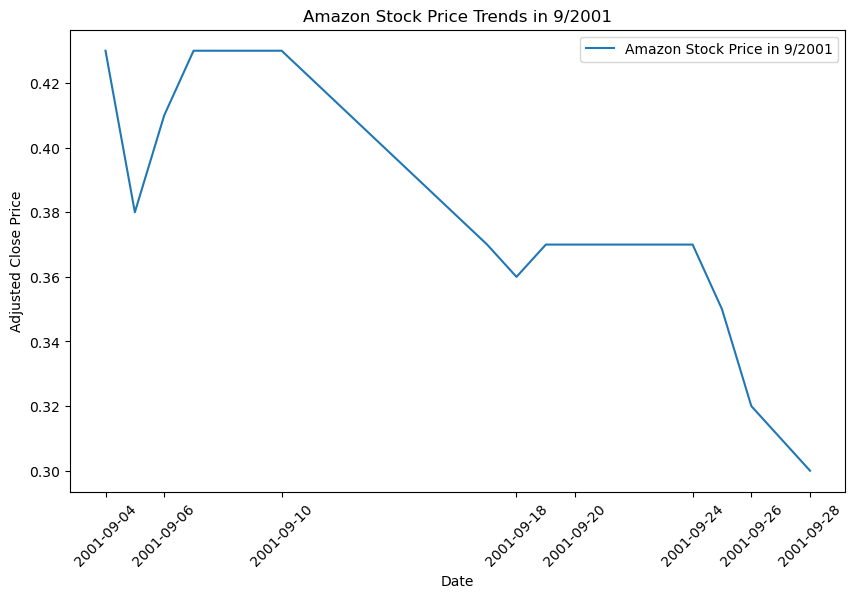

In [36]:
#6. Can you identify and analyze major events, such as earnings announcements or global events, 
#that coincide with notable spikes or declines in volatility?

# September 2001. Before and After 9/11 tragedy
selected_month = 9
selected_year = 2001

# Filter the DataFrame for the selected month and year
selected_month_data = train[(train.index.month == selected_month) & (train.index.year == selected_year)]

# Plotting with adjusted figure size
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

plt.plot(selected_month_data.index, selected_month_data['adjusted_close'], label=f'Amazon Stock Price in {selected_month}/{selected_year}')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title(f'Amazon Stock Price Trends in {selected_month}/{selected_year}')
plt.legend()

plt.xticks(selected_month_data.index[::2], rotation=45)

plt.show()

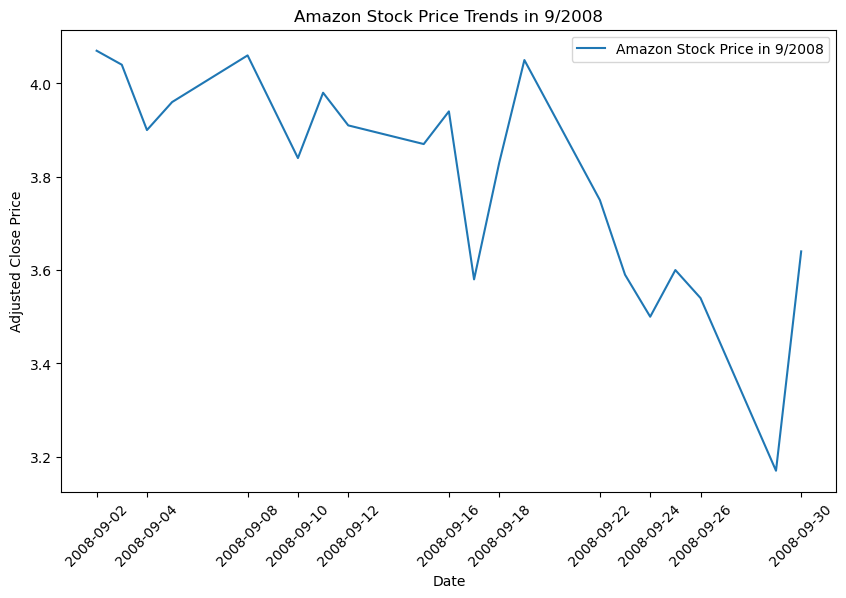

In [37]:
# September 2008. Before and After golabl stock market crash
selected_month = 9
selected_year = 2008

# Filter the DataFrame for the selected month and year
selected_month_data = train[(train.index.month == selected_month) & (train.index.year == selected_year)]

# Plotting with adjusted figure size
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

plt.plot(selected_month_data.index, selected_month_data['adjusted_close'], label=f'Amazon Stock Price in {selected_month}/{selected_year}')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title(f'Amazon Stock Price Trends in {selected_month}/{selected_year}')
plt.legend()

plt.xticks(selected_month_data.index[::2], rotation=45)

plt.show()

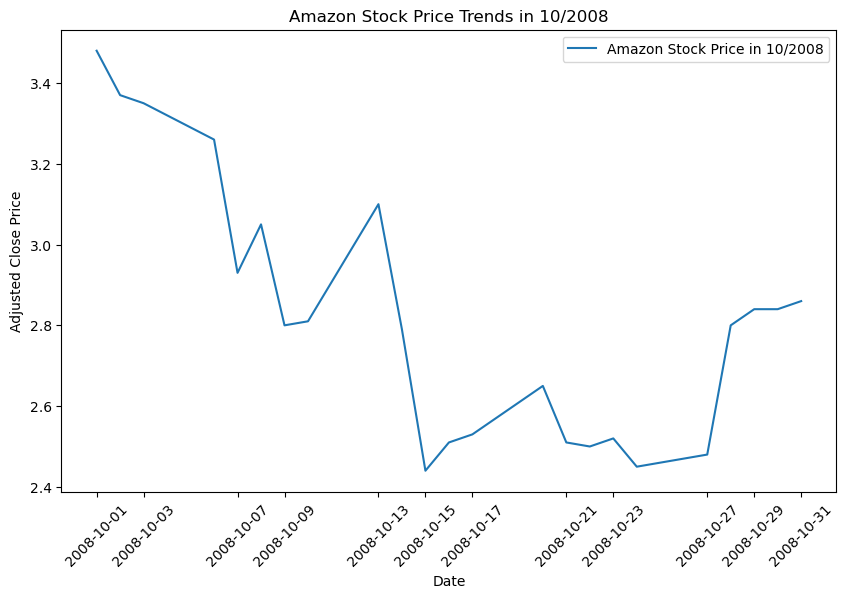

In [38]:
# September 2008. Before and After golabl stock market crash
selected_month = 10
selected_year = 2008

# Filter the DataFrame for the selected month and year
selected_month_data = train[(train.index.month == selected_month) & (train.index.year == selected_year)]

# Plotting with adjusted figure size
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

plt.plot(selected_month_data.index, selected_month_data['adjusted_close'], label=f'Amazon Stock Price in {selected_month}/{selected_year}')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title(f'Amazon Stock Price Trends in {selected_month}/{selected_year}')
plt.legend()

plt.xticks(selected_month_data.index[::2], rotation=45)

plt.show()

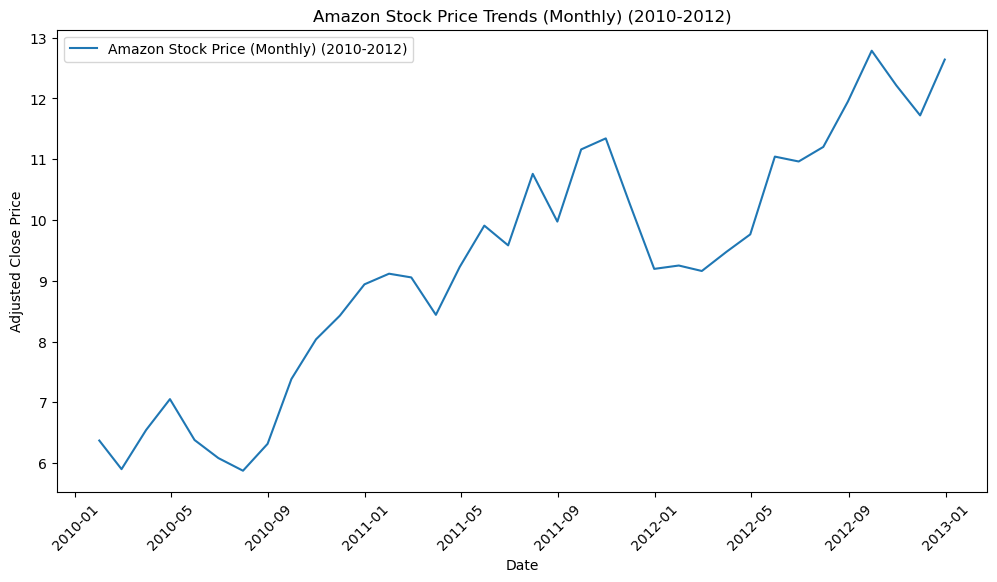

In [41]:
# European Debt Crisis 2010-2012
selected_start_year = 2010
selected_end_year = 2012

# Filter the DataFrame for the selected range of years
selected_year_data = train[(train.index.year >= selected_start_year) & (train.index.year <= selected_end_year)]

# Resample the data at a monthly frequency
selected_monthly_data = selected_year_data.resample('M').mean()  # You can use other aggregation methods if needed

# Plotting with adjusted figure size
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

plt.plot(selected_monthly_data.index, selected_monthly_data['adjusted_close'], label=f'Amazon Stock Price (Monthly) ({selected_start_year}-{selected_end_year})')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title(f'Amazon Stock Price Trends (Monthly) ({selected_start_year}-{selected_end_year})')
plt.legend()

plt.xticks(rotation=45)  # Adjust the rotation of x-axis ticks

plt.show()


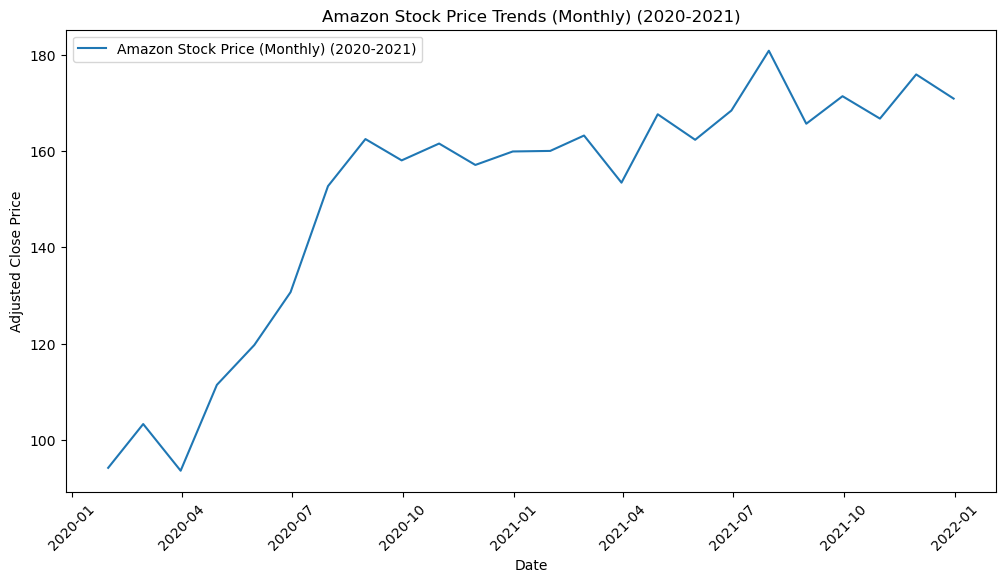

In [42]:
# European Debt Crisis 2010-2012
selected_start_year = 2020
selected_end_year = 2021

# Filter the DataFrame for the selected range of years
selected_year_data = df[(df.index.year >= selected_start_year) & (df.index.year <= selected_end_year)]

# Resample the data at a monthly frequency
selected_monthly_data = selected_year_data.resample('M').mean()  # You can use other aggregation methods if needed

# Plotting with adjusted figure size
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

plt.plot(selected_monthly_data.index, selected_monthly_data['adjusted_close'], label=f'Amazon Stock Price (Monthly) ({selected_start_year}-{selected_end_year})')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title(f'Amazon Stock Price Trends (Monthly) ({selected_start_year}-{selected_end_year})')
plt.legend()

plt.xticks(rotation=45)  # Adjust the rotation of x-axis ticks

plt.show()

6. After 9/11 the amazon stock price declined but it was a slow crashed until around the end of september (23th on) the price crashed and it didnt recover. 
 - During the big crash after September 29 2008 the market crash tremendously and volatility of some high and real lows where shwoing throghout October 2008. 
 - During the the European crash the amazon stock price decreased in 2010. However, the European Crash didn't directly affect amazon price during 2010-2012. Amazon kept a steady increase with adjustment periods with minimal price drop. 
 
 
 